# Heart attack possibility prediction 
# Exploratory Data Analysis

## Part 1 - Data Preprocessing
### Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sb;

import warnings
warnings.filterwarnings('ignore')

C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

### Importing the dataset

In [6]:
dataset = pd.read_csv('heart.csv')
s_dataset = dataset.sample(frac =1).reset_index(drop=True)


#X = s_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
#X = s_dataset.iloc[:, [0,1,2,7,8,9,10,11,12]].values
X = s_dataset.drop('target',axis=1)
y = s_dataset.iloc[:, -1].values

In [7]:
s_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
1,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
2,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
3,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
4,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0


In [8]:
s_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
print(s_dataset.shape)

(303, 14)


In [10]:
s_dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

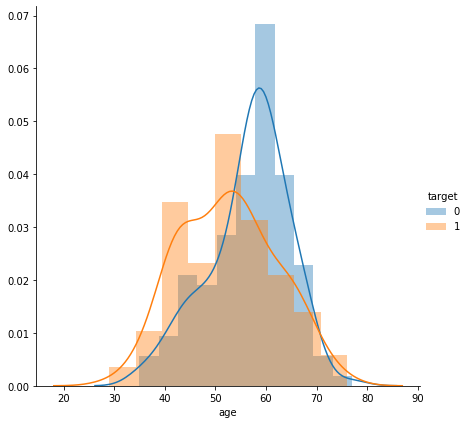

In [11]:
#histogram with respect to age

sb.FacetGrid(s_dataset, hue="target", size = 6)\
  .map(sb.distplot, "age")\
  .add_legend();  

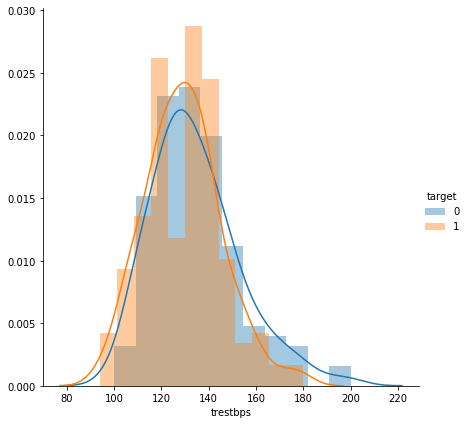

In [12]:
sb.FacetGrid(dataset, hue="target", size = 6)\
  .map(sb.distplot, "trestbps")\
  .add_legend(); 

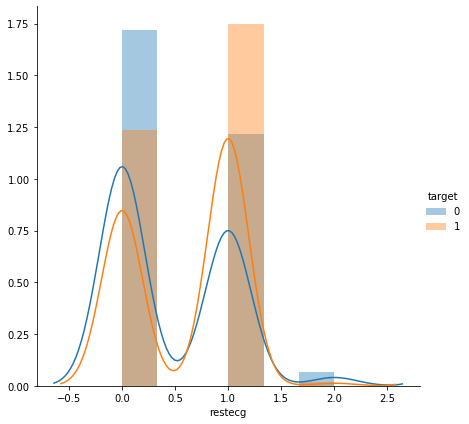

In [13]:
sb.FacetGrid(dataset, hue="target", size = 6)\
  .map(sb.distplot, "restecg")\
  .add_legend(); 

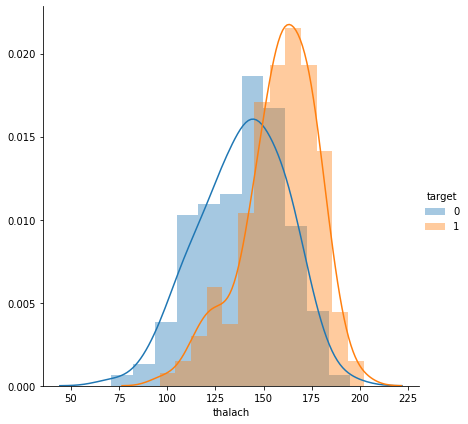

In [14]:
sb.FacetGrid(dataset, hue="target", size = 6)\
  .map(sb.distplot, "thalach")\
  .add_legend(); 

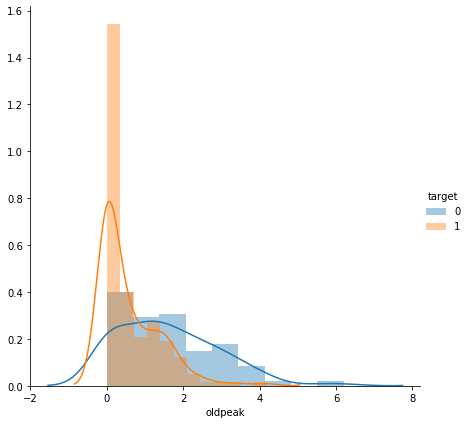

In [15]:
sb.FacetGrid(dataset, hue="target", size = 6)\
  .map(sb.distplot, "oldpeak")\
  .add_legend(); 

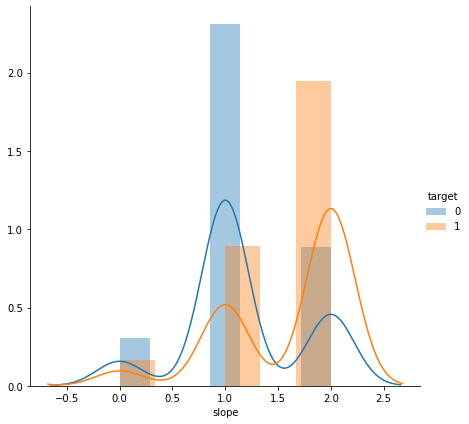

In [16]:
sb.FacetGrid(dataset, hue="target", size = 6)\
  .map(sb.distplot, "slope")\
  .add_legend(); 

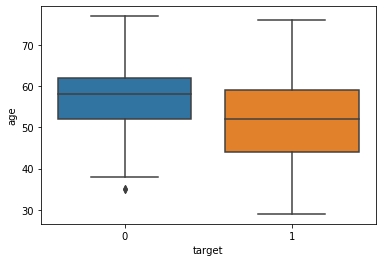

In [17]:
sb.boxplot(x="target", y="age", data= dataset)
plt.show();

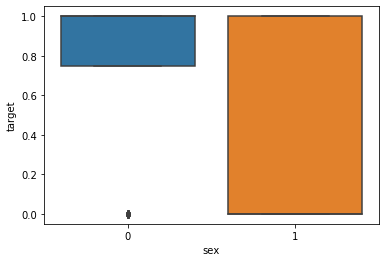

In [18]:
sb.boxplot(x="sex", y="target", data= dataset)
plt.show();

In [19]:
 def bar_plot(variable):
    """
    input: variable ex: sex
    output: barplot & value count
    """
    # get features
    var = s_dataset[variable]
    # count number of categorical variable (value/sample)
    varValue = var.value_counts()
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequanc")
    plt.title(variable)
    plt.show()
    
    print("{}\n{}".format(variable, varValue))

### Categorical variable bar plots

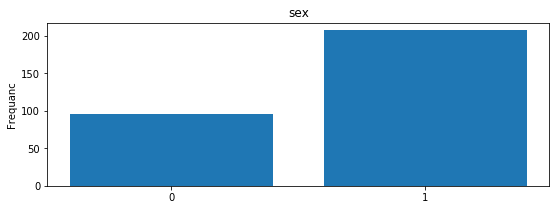

sex
1    207
0     96
Name: sex, dtype: int64


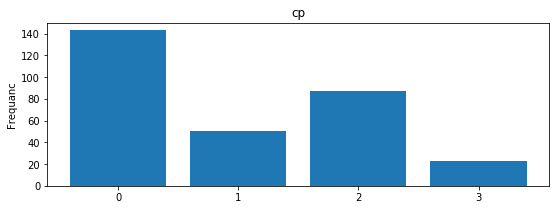

cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


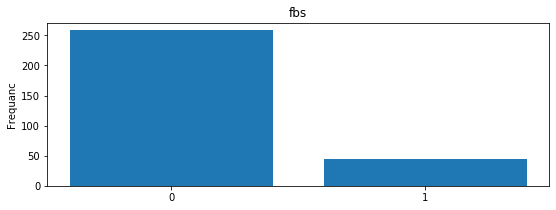

fbs
0    258
1     45
Name: fbs, dtype: int64


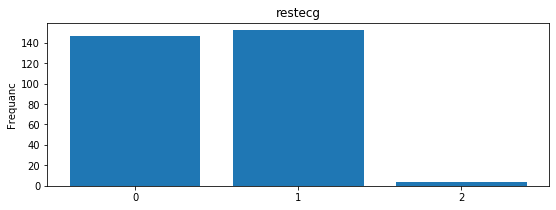

restecg
1    152
0    147
2      4
Name: restecg, dtype: int64


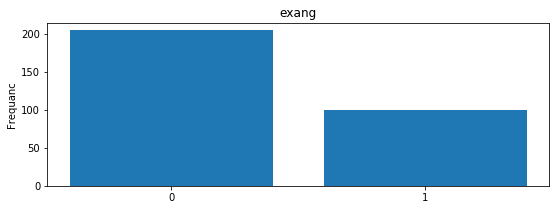

exang
0    204
1     99
Name: exang, dtype: int64


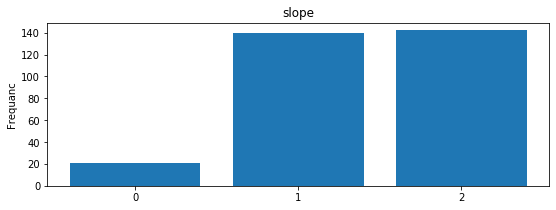

slope
2    142
1    140
0     21
Name: slope, dtype: int64


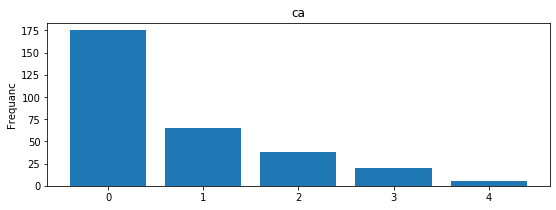

ca
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


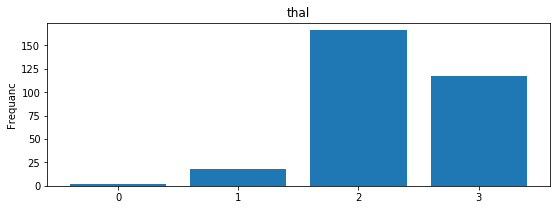

thal
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


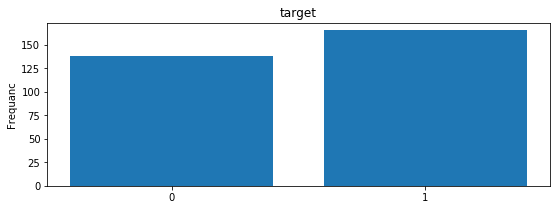

target
1    165
0    138
Name: target, dtype: int64


In [20]:
categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
for c in categorical:
    bar_plot(c)

#### Numerical variable bar plots

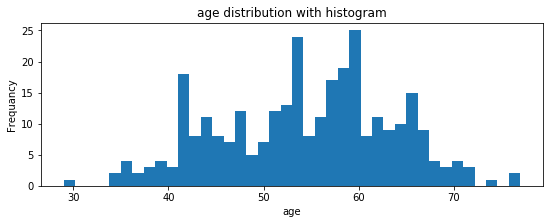

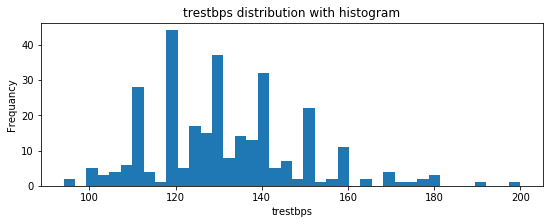

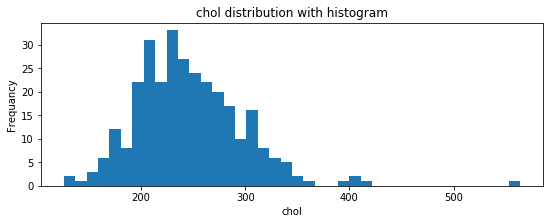

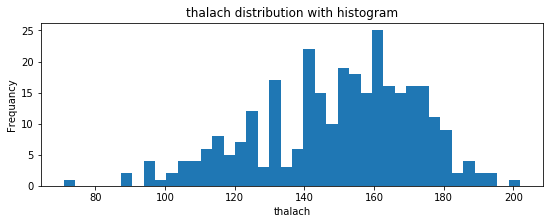

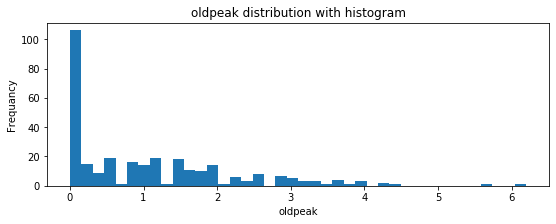

In [21]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(s_dataset[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("Frequancy")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()
numericVar = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for n in numericVar:
    plot_hist(n)

#### By observing the kaggle dataset there are no missing values

## Correlation heatmap

In [22]:
s_dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


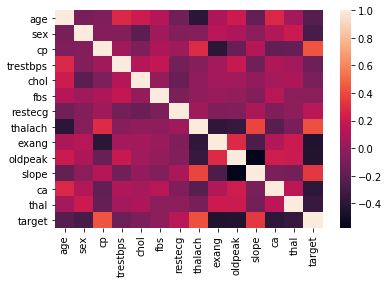

In [24]:

plot = sb.heatmap(dataset.corr(), linewidths=0 )

# ML ALGORITHMS
## Cross Validation Algorithms
#### Decision tree classifier
#### Support vector classifier
#### Random Forest Classifier
#### Logistic Regression
#### KNeighbours Classifier

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 1)

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state=random_state),
             SVC(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split":range(10,500,20),
                "max_depth":range(1,20,2)}

svc_param_grid = {"kernel":["rbf"],
                 "gamma":[0.001,0.01,0.1,1],
                 "C":[1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features":[1.3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

lr_param_grid = {"C":np.logspace(-3,3,7),
                "penalty":["l1","l2"]}

knn_param_grid = {"n_neighbors":np.linspace(1,19,10, dtype=int).tolist(),
                 "weights":["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   lr_param_grid,
                   knn_param_grid]

In [30]:
model_names=["DecisionTree :", "SVC : ", "RandomForest : ", "LogisticRegression : ", "KNN : "]
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv=StratifiedKFold(n_splits=10), scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(model_names[i], cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


DecisionTree : 0.7686666666666667
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


SVC :  0.8265
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RandomForest :  0.76
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


LogisticRegression :  0.8266666666666665
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


KNN :  0.8473333333333333


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.3s finished


[0.7686666666666667, 0.8265, 0.76, 0.8266666666666665, 0.8473333333333333]


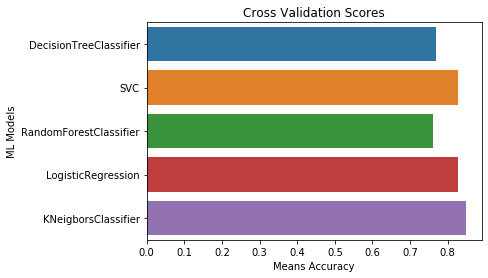

In [32]:
print(cv_result)
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVC", "RandomForestClassifier", "LogisticRegression", "KNeigborsClassifier"]})

g = sb.barplot(x="Cross Validation Means", y = "ML Models", data=cv_results)
g.set_xlabel("Means Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

# Artificial Neural Network(ANN)
##  Building the ANN
### Initialising the ANN

In [33]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=9, activation ='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
ann.add(tf.keras.layers.Dropout(0.45))

In [36]:
ann.add(tf.keras.layers.Dense(units=6, activation ='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
ann.add(tf.keras.layers.Dropout(0.52))

### Adding the output layer

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN
### Compiling the ANN

In [38]:
optimizer = keras.optimizers.Adam(learning_rate= 0.01)
ann.compile( optimizer=optimizer , loss = 'binary_crossentropy' , metrics = ['accuracy']  )


### Training the ANN on the Training set

In [39]:
ann.fit(X_train,y_train , validation_split=0.2,batch_size= 16 , verbose=2,shuffle = True,epochs  = 100)
test_loss, test_acc = ann.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 193 samples, validate on 49 samples
Epoch 1/100
193/193 - 0s - loss: 0.9421 - acc: 0.5389 - val_loss: 0.6713 - val_acc: 0.6735
Epoch 2/100
193/193 - 0s - loss: 0.6919 - acc: 0.5803 - val_loss: 0.6572 - val_acc: 0.7551
Epoch 3/100
193/193 - 0s - loss: 0.6752 - acc: 0.5959 - val_loss: 0.6429 - val_acc: 0.7959
Epoch 4/100
193/193 - 0s - loss: 0.6750 - acc: 0.6062 - val_loss: 0.6162 - val_acc: 0.7755
Epoch 5/100
193/193 - 0s - loss: 0.6197 - acc: 0.6321 - val_loss: 0.5849 - val_acc: 0.7755
Epoch 6/100
193/193 - 0s - loss: 0.6079 - acc: 0.6684 - val_loss: 0.5869 - val_acc: 0.7551
Epoch 7/100
193/193 - 0s - loss: 0.6454 - acc: 0.6684 - val_loss: 0.5648 - val_acc: 0.7755
Epoch 8/100
193/193 - 0s - loss: 0.6226 - acc: 0.6580 - val_loss: 0.5399 - val_acc: 0.7551
Epoch 9/100
193/193 - 0s - loss: 0.6017 - acc: 0.6788 - val_loss: 0.5192 - val_acc: 0.7959
Epoch 10/100
193/193 - 0s - loss: 0.5986 -

Epoch 85/100
193/193 - 0s - loss: 0.4621 - acc: 0.7668 - val_loss: 0.4510 - val_acc: 0.8367
Epoch 86/100
193/193 - 0s - loss: 0.3911 - acc: 0.7979 - val_loss: 0.4681 - val_acc: 0.7959
Epoch 87/100
193/193 - 0s - loss: 0.4584 - acc: 0.8031 - val_loss: 0.4600 - val_acc: 0.8163
Epoch 88/100
193/193 - 0s - loss: 0.4853 - acc: 0.7461 - val_loss: 0.4639 - val_acc: 0.7959
Epoch 89/100
193/193 - 0s - loss: 0.4342 - acc: 0.7824 - val_loss: 0.4756 - val_acc: 0.7959
Epoch 90/100
193/193 - 0s - loss: 0.4533 - acc: 0.7979 - val_loss: 0.4875 - val_acc: 0.7755
Epoch 91/100
193/193 - 0s - loss: 0.4400 - acc: 0.7927 - val_loss: 0.4970 - val_acc: 0.7959
Epoch 92/100
193/193 - 0s - loss: 0.4253 - acc: 0.7927 - val_loss: 0.5293 - val_acc: 0.7755
Epoch 93/100
193/193 - 0s - loss: 0.5001 - acc: 0.7461 - val_loss: 0.5258 - val_acc: 0.7755
Epoch 94/100
193/193 - 0s - loss: 0.4458 - acc: 0.7565 - val_loss: 0.5052 - val_acc: 0.8163
Epoch 95/100
193/193 - 0s - loss: 0.4490 - acc: 0.7979 - val_loss: 0.5158 - val_

## XGBOoost Classifier

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')


[10:43:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[24  7]
 [ 0 30]]


Accuracy of Extreme Gradient Boost: 88.52459016393442 



In [41]:
model_ev = pd.DataFrame({'Model': ['Extreme Gradient Boost','ANN'], 'Accuracy': [xgb_acc_score*100,test_acc*100]})
model_ev

,Model,Accuracy
0,Extreme Gradient Boost,88.524590
1,ANN,83.606559


## Making the predictions and evaluating the model

In [43]:
age = int(input("Enter your age: "))
sex = int(input("Enter 0 if you are female, 1 if you are male: "))
cp = int(input("Enter your chest pain type 1/2/3/4: "))
trestbps = int(input("Enter your resting blood pressure: "))
chol = int(input("Enter your serum cholestrol in mg/dl: "))
fbs = int(input("Enter 1 if your fbs is greater than 120mg/dl"))
restecg = int(input("Enter your resting ecg 0/1/2: "))
thalach = int(input("Enter maximum heart rate achieved : "))
exang = int(input("Do you have exercise induced agnia? 0/1"))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest? "))
slope = int(input("Slope of the peak exercise ST segment: 0/1/2"))
ca = int(input("number of major vessels (0-3) "))
thal = int(input("0 = normal; 1 = fixed defect; 2 = reversable defect"))


Enter your age: 63
Enter 0 if you are female, 1 if you are male: 1
Enter your chest pain type 1/2/3/4: 3
Enter your resting blood pressure: 145
Enter your serum cholestrol in mg/dl: 233
Enter 1 if your fbs is greater than 120mg/dl1
Enter your resting ecg 0/1/2: 0
Enter maximum heart rate achieved : 150
Do you have exercise induced agnia? 0/10
Enter ST depression induced by exercise relative to rest? 2.3
Slope of the peak exercise ST segment: 0/1/20
number of major vessels (0-3) 0
0 = normal; 1 = fixed defect; 2 = reversable defect1


In [44]:
if(ann.predict(sc.transform([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]))>0.5):
    print("You have a possibility of heart attack")
else:
    print("No worries")

You have a possibility of heart attack
